Data is on Q's laptop :)

From this dataset [UCSD parkinson](https://openneuro.org/datasets/ds002778/versions/1.0.5)

Citations for the dataset:

Nicko Jackson, Scott R. Cole, Bradley Voytek, Nicole C. Swann. Characteristics of Waveform Shape in Parkinson's Disease Detected with Scalp Electroencephalography. eNeuro 20 May 2019, 6 (3) ENEURO.0151-19.2019; DOI: 10.1523/ENEURO.0151-19.2019.

Swann NC, de Hemptinne C, Aron AR, Ostrem JL, Knight RT, Starr PA. Elevated synchrony in Parkinson disease detected with electroencephalography. Ann Neurol. 2015 Nov;78(5):742-50. doi: 10.1002/ana.24507. Epub 2015 Sep 2. PMID: 26290353; PMCID: PMC4623949.

George JS, Strunk J, Mak-McCully R, Houser M, Poizner H, Aron AR. Dopaminergic therapy in Parkinson's disease decreases cortical beta band coherence in the resting state and increases cortical beta band power during executive control. Neuroimage Clin. 2013 Aug 8;3:261-70. doi: 10.1016/j.nicl.2013.07.013. PMID: 24273711; PMCID: PMC3814961.

Appelhoff, S., Sanderson, M., Brooks, T., Vliet, M., Quentin, R., Holdgraf, C., Chaumon, M., Mikulan, E., Tavabi, K., Höchenberger, R., Welke, D., Brunner, C., Rockhill, A., Larson, E., Gramfort, A. and Jas, M. (2019). MNE-BIDS: Organizing electrophysiological data into the BIDS format and facilitating their analysis. Journal of Open Source Software 4: (1896).

Pernet, C. R., Appelhoff, S., Gorgolewski, K. J., Flandin, G.,
Phillips, C., Delorme, A., Oostenveld, R. (2019). EEG-BIDS, an extension to the brain imaging data structure for electroencephalography. Scientific Data, 6, 103. https://doi.org/10.1038/s41597-019-0104-8.


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mne

## Inspect data

In [2]:
data_path = '/Users/quirine/Documents/Projects/parkinson_rest/DATA/'
sub_pd = 'sub-pd9/ses-off/eeg/sub-pd9_ses-off_task-rest_eeg.bdf'
sub_hc = 'sub-hc7/ses-hc/eeg/sub-hc7_ses-hc_task-rest_eeg.bdf'

In [3]:
df = pd.read_json(data_path + '/participants.json', orient=str)

In [4]:
df1 = pd.read_csv(data_path + '/participants.tsv', sep='\t')

In [5]:
df

,participant_id,age,gender,hand,MMSE,NAART,disease_duration,rl_deficits,notes
Description,Unique participant identifier,Age of the participant at time of testing,Gender identity of the participant,Handedness of the participant,Mini-Mental State Examination score,"North American Adult Reading Test score, score...",How long since the patient was diagnosed,Which side of the body has deficits and how gr...,Experimenter/curator notes on collection and c...
Units,NaN,years,NaN,NaN,NaN,NaN,years,NaN,NaN
Levels,NaN,NaN,"{'F': 'female', 'M': 'male'}","{'R': 'right', 'L': 'left', 'A': 'ambidextrous'}","{'>24': 'normal cognition', '19 - 23': 'mild c...",NaN,NaN,NaN,NaN


In [6]:
df1

,participant_id,age,gender,hand,MMSE,NAART,disease_duration,rl_deficits,notes
0,sub-hc1,54,f,r,30,48,NaN,NaN,NaN
1,sub-hc2,50,f,r,30,55,NaN,NaN,NaN
2,sub-pd3,52,f,r,29,44,9.0,R,NaN
3,sub-hc4,50,f,r,30,52,NaN,NaN,NaN
4,sub-pd5,67,f,r,29,48,2.0,"No clear side, perhaps more L",NaN
5,sub-pd6,62,f,r,30,42,8.0,"L OFF meds, more R ON meds",Used preprocessed data from EEGLAB .mat file i...
6,sub-hc7,54,f,r,26,48,NaN,NaN,NaN
7,sub-hc8,71,f,r,29,41,NaN,NaN,NaN
8,sub-pd9,55,f,r,28,50,12.0,R,NaN
9,sub-hc10,59,f,r,29,51,NaN,NaN,NaN


## import 2 subjects Cz electrode only and filter within 1-45 Hz

In [7]:
data_pd = mne.io.read_raw_bdf(data_path + sub_pd, preload=True)

data_hc = mne.io.read_raw_bdf(data_path + sub_hc, preload=True)

Extracting EDF parameters from /Users/quirine/Documents/Projects/parkinson_rest/DATA/sub-pd9/ses-off/eeg/sub-pd9_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 97791  =      0.000 ...   190.998 secs...
Extracting EDF parameters from /Users/quirine/Documents/Projects/parkinson_rest/DATA/sub-hc7/ses-hc/eeg/sub-hc7_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 98303  =      0.000 ...   191.998 secs...


In [9]:
print(mne.find_events(data_pd))

# The array of events. The first column contains the event time in samples, with first_samp included. 
# The third column contains the event id.

Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1 events found
Event IDs: [1]
[[1493    0    1]]


In [11]:
data_pd.times[1493]

2.916015625

In [12]:
data_pd.times[-1]

190.998046875

In [127]:
data_pd.info

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 40 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 104.0 Hz
 meas_date: 2011-03-07 12:42:33 UTC
 nchan: 41
 projs: []
 sfreq: 512.0 Hz
>

In [128]:
data_hc.info

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 40 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 104.0 Hz
 meas_date: 2011-02-25 13:25:06 UTC
 nchan: 41
 projs: []
 sfreq: 512.0 Hz
>

In [129]:
data_pd.filter(l_freq=1, h_freq=40)
data_hc.filter(l_freq=1, h_freq=40)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge

<RawEDF | sub-hc7_ses-hc_task-rest_eeg.bdf, 41 x 98304 (192.0 s), ~30.8 MB, data loaded>

Effective window size : 4.000 (s)


<ipython-input-130-9200a63c9fc4>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  data_hc.plot_psd()


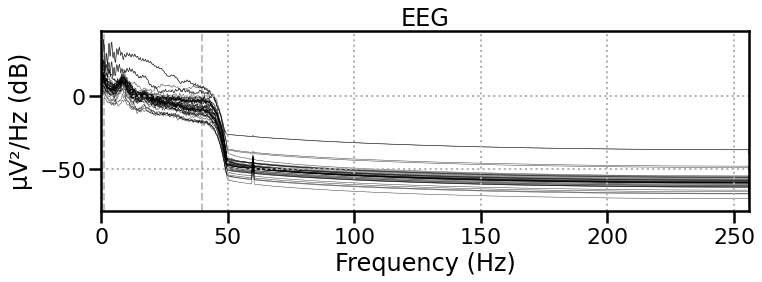

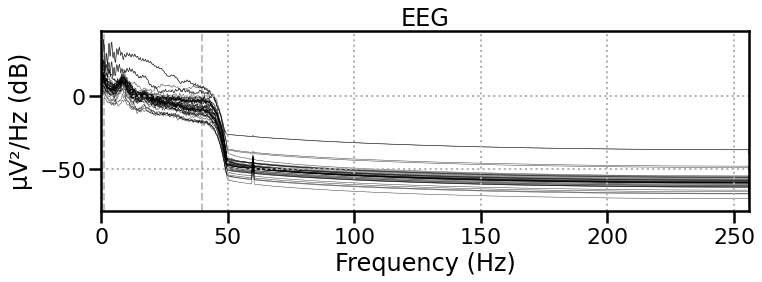

In [130]:
data_hc.plot_psd()

In [138]:
pd_cz = data_pd.get_data(picks='Cz').squeeze()
pd_time = data_pd.times

hc_cz = data_hc.get_data(picks='Cz').squeeze()
hc_time = data_hc.times

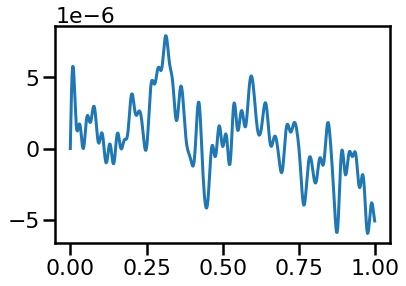

In [143]:
plt.plot(pd_time[:512], pd_cz[:512]) # plot 1 second of data

In [144]:
pd_time.shape

(97792,)

In [145]:
hc_time.shape

(98304,)

In [157]:
# combine into 1 array to import into new notebook:
hc_cz = hc_cz[:len(pd_time)] # make sure they are the same length

# concatenate with time-axis
data = np.vstack((pd_cz, hc_cz, pd_time))

### Shape of data is 3 rows and n time points.
1st row = pd data
2nd row = hc data
3rd row = time data
sampling frequency = 512 Hz

In [160]:
np.save('../data/resting_eeg', data)